# Step 1: Import Libraries

In [160]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# Step 2: Download Image

In [161]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Digit-Binarization/main/Pictures/number0.jpg -O number0.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Digit-Binarization/main/Pictures/number1.jpg -O number1.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Digit-Binarization/main/Pictures/number2.jpg -O number2.jpg

--2025-04-26 20:36:15--  https://raw.githubusercontent.com/AsadiAhmad/Digit-Binarization/main/Pictures/number0.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30616 (30K) [image/jpeg]
Saving to: ‘number0.jpg’

number0.jpg         100%[===================>]  29.90K  --.-KB/s    in 0.007s  

2025-04-26 20:36:16 (3.90 MB/s) - ‘number0.jpg’ saved [30616/30616]

--2025-04-26 20:36:16--  https://raw.githubusercontent.com/AsadiAhmad/Digit-Binarization/main/Pictures/number1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91849 (90

# Step 3: Load Image

In [162]:
image = cv.imread('number0.jpg', cv.IMREAD_GRAYSCALE)

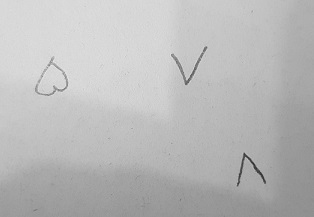

In [163]:
cv2_imshow(image)

# Step 4: Image Binarization

In [164]:
noise_removed = cv.medianBlur(image, 5)
binary_image = cv.adaptiveThreshold(noise_removed, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

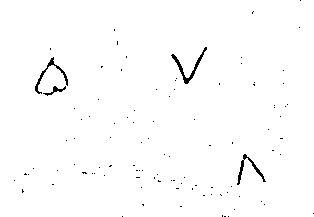

In [165]:
cv2_imshow(binary_image)

# Step 5: Invert the Binary Image

In [166]:
inverted_image = 255 - binary_image

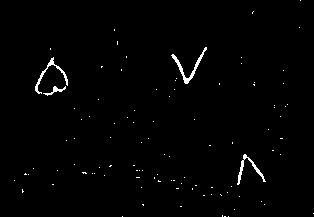

In [167]:
cv2_imshow(inverted_image)

# Step 6: Opening Image for Completely remove Noise

## Erosion for removing noise

In [168]:
kernel = np.ones((2, 2), np.uint8)
erosion = cv.erode(inverted_image, kernel, iterations = 1)

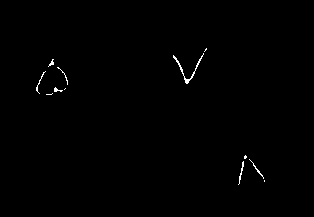

In [169]:
cv2_imshow(erosion)

## Dilation for Bolding the numbers

In [170]:
kernel2 = np.ones((5, 5), np.uint8)
dilation = cv.dilate(erosion, kernel2, iterations = 1)

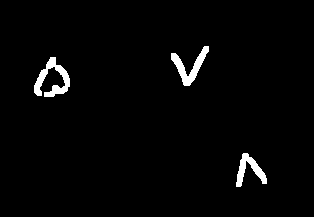

In [171]:
cv2_imshow(dilation)

# Step 7: Invert Image again

In [172]:
inverted_image2 = 255 - dilation

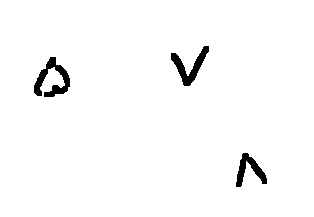

In [173]:
cv2_imshow(inverted_image2)

# Step 8: All together for other images

In [174]:
def binarization_image(image, blur_value=5, kernel_erosion=(2, 2), kernel_dilation=(5, 5)):
    noise_removed = cv.medianBlur(image, blur_value)
    binary_image = cv.adaptiveThreshold(noise_removed, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    inverted_image = 255 - binary_image
    kernel = np.ones(kernel_erosion, np.uint8)
    erosion = cv.erode(inverted_image, kernel, iterations = 1)
    kernel2 = np.ones(kernel_dilation, np.uint8)
    dilation = cv.dilate(erosion, kernel2, iterations = 1)
    inverted_image2 = 255 - dilation
    return inverted_image2

In [175]:
image2 = cv.imread('number1.jpg', cv.IMREAD_GRAYSCALE)
image3 = cv.imread('number2.jpg', cv.IMREAD_GRAYSCALE)

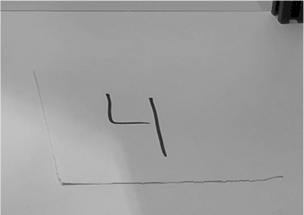

In [176]:
cv2_imshow(image2)

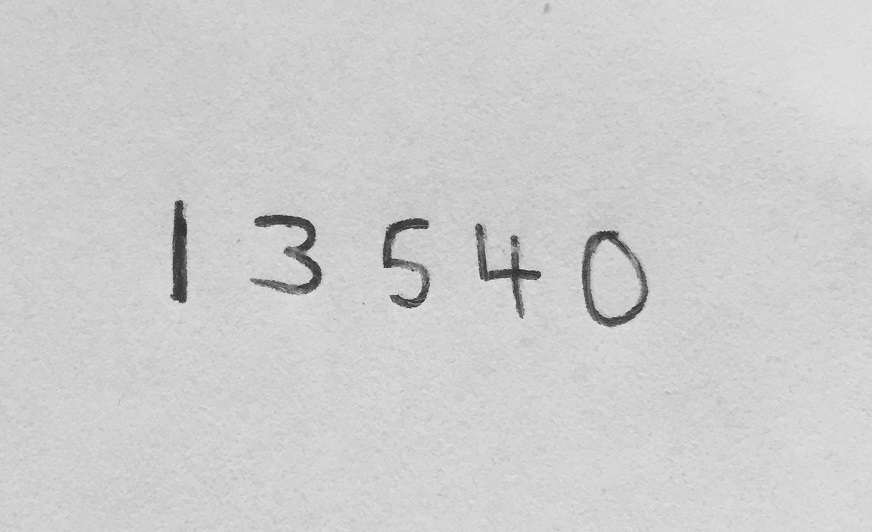

In [177]:
cv2_imshow(image3)

In [229]:
bin_image2 = binarization_image(image2, blur_value=3, kernel_erosion=(2, 2), kernel_dilation=(5, 5))
bin_image3 = binarization_image(image3, blur_value=13, kernel_erosion=(3, 3), kernel_dilation=(6, 6))

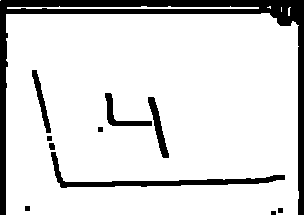

In [230]:
cv2_imshow(bin_image2)

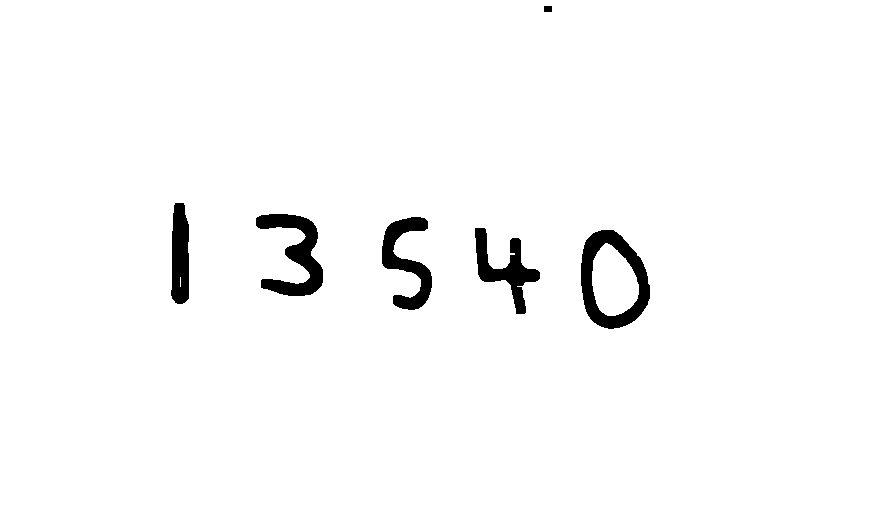

In [214]:
cv2_imshow(bin_image3)